In [1]:
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt


In [3]:
# paths.
isles_data_dir = "C:/Users/Carlo/Documents/GitHub/seminario/Stroke-Seminario/data"
example_case = 9

# Set images path.
dwi_path = os.path.join(
    isles_data_dir,
    "raw_data",
    "sub-strokecase{}".format("%04d" % example_case),
    "ses-0001",
    "dwi",
    "sub-strokecase{}_ses-0001_dwi.nii.gz".format("%04d" % example_case),
)
# Set images path.
adc_path = os.path.join(
    isles_data_dir,
    "raw_data",
    "sub-strokecase{}".format("%04d" % example_case),
    "ses-0001",
    "dwi",
    "sub-strokecase{}_ses-0001_adc.nii.gz".format("%04d" % example_case),
)

# Set images path.
flair_path = os.path.join(
    isles_data_dir,
    "raw_data",
    "sub-strokecase{}".format("%04d" % example_case),
    "ses-0001",
    "anat",
    "sub-strokecase{}_ses-0001_FLAIR.nii.gz".format("%04d" % example_case),
)

# Set images path.
mask_path = os.path.join(
    isles_data_dir,
    "raw_data",
    "derivatives",
    "sub-strokecase{}".format("%04d" % example_case),
    "ses-0001",
    "sub-strokecase{}_ses-0001_msk.nii.gz".format("%04d" % example_case),
)

In [4]:
dwi_image = nib.load(dwi_path).get_fdata()
adc_image = nib.load(adc_path).get_fdata()
flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_path).get_fdata()

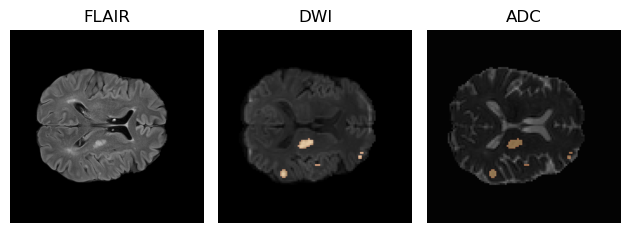

In [5]:
# Lets visualize the MR images with their corresponding mask overlays.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Show FLAIR image.
ax1.imshow(flair_image[:, :, 16], cmap="gray")
ax1.set_title("FLAIR")
ax1.set_axis_off()

slice2show = 40
# Show DWI image w/overlayed mask.
ax2.imshow(dwi_image[:, :, slice2show], cmap="gray")
ax2.imshow(mask_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax2.set_title("DWI")
ax2.set_axis_off()

# Show ADC image w/overlayed mask.
ax3.imshow(adc_image[:, :, slice2show], cmap="gray")
ax3.imshow(mask_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax3.set_title("ADC")
ax3.set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
# As an example, we'll segment the DWI using a 99th-percentile intensity cutoff. 
dwi_cutoff = np.percentile(dwi_image[dwi_image>0], 99) 
segmented_image = dwi_image > dwi_cutoff

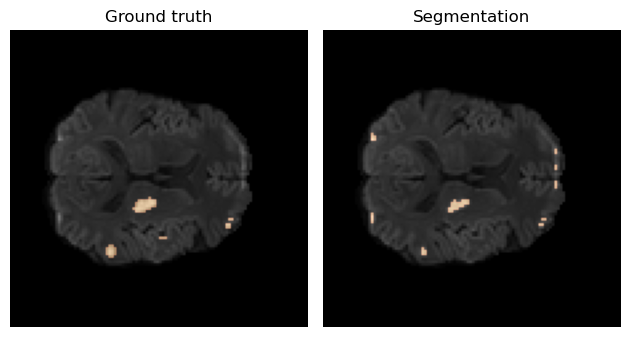

In [7]:
# Lets visualize the segmentation we've created.
# Show ground truth.
fig2, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax1.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax1.set_title('Ground truth')
ax1.set_axis_off()

# Show predicted segmentation.
ax2.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax2.imshow(segmented_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('Segmentation')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

Dimensiones de la imagen: (112, 112, 73)


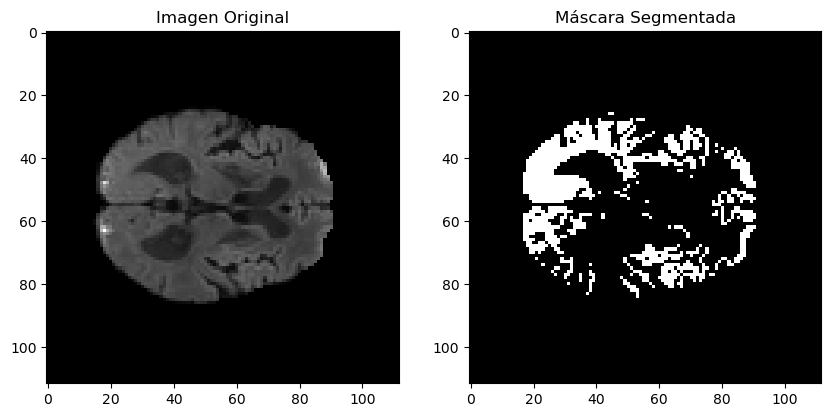

Máscara guardada como 'mascara_segmentada.nii.gz'


In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import SimpleITK as sitk

# Ruta de la imagen NIfTI (.nii.gz)
nii_path = r"C:\Users\Carlo\Documents\GitHub\seminario\Stroke-Seminario\data\raw_data\sub-strokecase0001\ses-0001\dwi\sub-strokecase0001_ses-0001_dwi.nii.gz"

# Cargar imagen con Nibabel
nii_img = nib.load(nii_path)
nii_data = nii_img.get_fdata()  # Convertir a array numpy

# Mostrar información de la imagen
print(f"Dimensiones de la imagen: {nii_data.shape}")

# Seleccionar un corte axial central
slice_index = nii_data.shape[2] // 2  # Tomamos el corte del medio
slice_data = nii_data[:, :, slice_index]

# Normalizar la imagen a 8 bits (0-255) para procesamiento
slice_norm = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data))
slice_norm = (slice_norm * 255).astype(np.uint8)

# Aplicar umbralización para segmentar el derrame
_, mask = cv2.threshold(slice_norm, 80, 255, cv2.THRESH_BINARY)  # Ajusta 80 según la intensidad de la lesión

# Mostrar imagen original y máscara
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(slice_norm, cmap="gray")
axes[0].set_title("Imagen Original")
axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Máscara Segmentada")
plt.show()

# Guardar la máscara como nueva imagen NIfTI
mask_3d = np.zeros_like(nii_data)
mask_3d[:, :, slice_index] = mask  # Aplicamos la máscara solo en el corte actual

# Crear objeto NIfTI y guardar
mask_nifti = nib.Nifti1Image(mask_3d, affine=nii_img.affine)
nib.save(mask_nifti, "mascara_segmentada.nii.gz")
print("Máscara guardada como 'mascara_segmentada.nii.gz'")
